# Классификация текстов
## Цель работы
Применить методы машинного обучения для решения задач классификации текстов.

## Задания для выполнения
1. Загрузите датасет Olivetti faces;
2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.
3. Выведите информацию о количественных параметрах датасета;
4. Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;
5. Разделите эти данные на тестовую и обучающую выборки;
6. Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;
7. Оцените качество модели на тестовой выборке с помощью следующих метрик:
достоверность предсказания (accuracy);
точность (precision);
полнота (recall);
8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.
9. Сделайте вывод о применимости модели.

### 1. Загрузка датасета Olivetti Faces

In [1]:
from sklearn.datasets import fetch_olivetti_faces 

In [2]:
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/egorprozorov/scikit_learn_data


In [3]:
X = faces_data.data
y = faces_data.target

### 2. Описание и структура датасета

In [4]:
X.shape, y.shape

((400, 4096), (400,))

### 3. Вывод информации о количественных параметрах

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(X)

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


### 4. Вывод нескольких изображений с использованием matplotlib

In [8]:
import matplotlib.pyplot as plt

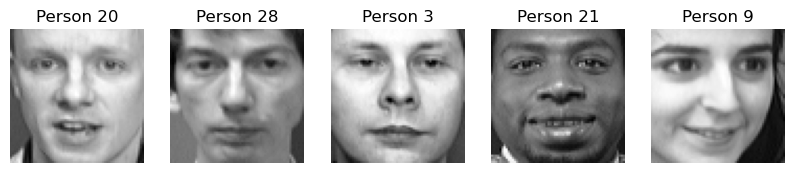

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"Person {y[i]}")
    ax.axis('off')
plt.show()

### 5. Разделение на обучающую и тестовую выборки

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 6. Построение модели классификатора SVM

In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [15]:
y_pred = svm.predict(X_test_scaled)

### 7. Оценка качества модели

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [18]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9417
Precision: 0.9513
Recall: 0.9417


### 8. Построение кривой обучения

In [19]:
import numpy as np
from sklearn.model_selection import learning_curve

In [20]:
train_sizes, train_scores, test_scores = learning_curve(svm, X_train_scaled, y_train, cv=5, scoring='accuracy')

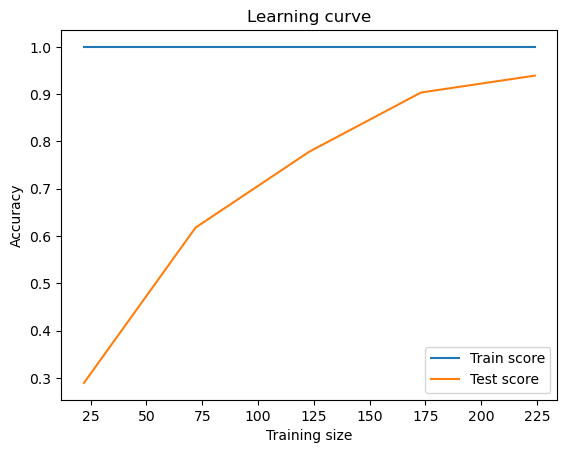

In [21]:
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Learning curve')
plt.legend()
plt.show()

### 9. Вывод

Мы можем заметить, что модель показала себя хорошо, однако если рассматривать график, то тренировочные показатели практически равны 1 или держатся на этом уровне, когда как тестовая кривая растет по мере увеличения данных, что может соответствовать переобучению модели. 

1. **Какие выводы мы можем сделать на основании метрик модели, построенной в данной лабораторной работе?**

   На основании метрик модели можно сделать следующие выводы:
   - Оценить качество модели, проверив, как она справляется с обучением и тестированием.
   - Определить, насколько хорошо модель обобщает на новые данные (например, проверка на переобучение или недообучение).
   - Понять, какие ошибки модель делает чаще (например, ложноположительные или ложноотрицательные ошибки).
   - Сравнить разные модели и выбрать ту, которая дает наилучшие результаты по выбранным метрикам (например, точность, полнота, F1-мера).

2. **Как представляется изображение в методах машинного обучения? От чего зависит размерность вектора признаков?**

   Изображение в методах машинного обучения представляется в виде матрицы пикселей, где каждый пиксель имеет свое значение (например, интенсивность цвета). В случае цветного изображения каждый пиксель может быть представлен тремя значениями (RGB). Когда изображение используется как вход в модель, оно часто преобразуется в одномерный вектор, где размерность вектора зависит от разрешения изображения. Например, для изображения размером 28x28 пикселей с одной цветовой составляющей (ч/б), размерность вектора признаков будет 28 * 28 = 784. Для цветных изображений (RGB) размерность будет в три раза больше.

3. **Какие задачи можно решать при помощи анализа изображений? Какие из них самые распространенные?**

   При помощи анализа изображений можно решать различные задачи, включая:
   - **Классификация изображений**: Определение класса, к которому принадлежит изображение (например, определение породы собаки).
   - **Обнаружение объектов (Object Detection)**: Найти и классифицировать объекты в изображении, например, найти все машины на фотографии.
   - **Сегментация изображений**: Разделение изображения на несколько областей (например, выделение всех клеток на медицинских снимках).
   - **Распознавание лиц**: Определение и идентификация лиц на изображениях.
   - **Стилизация и генерация изображений**: Например, генерация изображений с помощью нейронных сетей (генеративные модели).
   - **Улучшение качества изображений**: Например, удаление шума или повышение разрешения.
   
   Самые распространенные задачи: классификация изображений и обнаружение объектов.

4. **Какие известные датасеты изображений существуют? Для каких задач они применяются?**

   Некоторые известные датасеты изображений включают:
   - **MNIST**: Датасет с изображениями рукописных цифр. Используется для задачи классификации.
   - **CIFAR-10**: Датасет с 60,000 изображениями 10 классов, используемый для классификации.
   - **ImageNet**: Огромный датасет с миллионами изображений, использующийся для классификации и обнаружения объектов.
   - **COCO** (Common Objects in Context): Датасет для задачи обнаружения объектов и сегментации.
   - **LFW** (Labeled Faces in the Wild): Датасет для распознавания лиц на изображениях.
   - **ADE20K**: Датасет для задачи сегментации изображений, где изображения размечены на уровне пикселей.
   
   Эти датасеты применяются для задач классификации изображений, обнаружения объектов, сегментации, распознавания лиц и других задач в области компьютерного зрения.